In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Pritam Laskar/Documents/PGCM - DA/Term II/Term II Study Materials/204 Clustering/ML+04+Clustering+Datset.csv")

In [3]:
df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


# Data Cleaning

In [4]:
df.isnull().sum()/len(df)*100

area                     0.0
perimeter                0.0
compactness              0.0
length                   0.0
width                    0.0
asymmetry_coefficient    0.0
groove_length            0.0
grain_variety            0.0
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
 7   grain_variety          210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df['area'].unique()

array([15.26, 14.88, 14.29, 13.84, 16.14, 14.38, 14.69, 14.11, 16.63,
       16.44, 14.03, 13.89, 13.78, 13.74, 14.59, 13.99, 15.69, 14.7 ,
       12.72, 14.16, 15.88, 12.08, 15.01, 16.19, 13.02, 12.74, 13.45,
       13.16, 15.49, 14.09, 13.94, 15.05, 16.12, 16.2 , 17.08, 14.8 ,
       14.28, 13.54, 13.5 , 15.5 , 15.11, 13.8 , 15.36, 14.99, 14.79,
       14.86, 14.43, 15.78, 14.49, 14.33, 14.52, 15.03, 14.46, 14.92,
       15.38, 12.11, 11.42, 11.23, 12.36, 13.22, 12.78, 12.88, 14.34,
       14.01, 14.37, 12.73, 17.63, 16.84, 17.26, 19.11, 16.82, 16.77,
       17.32, 20.71, 18.94, 17.12, 16.53, 18.72, 20.2 , 19.57, 19.51,
       18.27, 18.88, 18.98, 21.18, 20.88, 20.1 , 18.76, 18.81, 18.59,
       18.36, 16.87, 19.31, 18.17, 16.41, 17.99, 19.46, 19.18, 18.95,
       18.83, 18.85, 19.94, 18.55, 18.45, 19.38, 19.13, 19.14, 20.97,
       19.06, 18.96, 19.15, 18.89, 20.03, 20.24, 18.14, 16.17, 18.43,
       15.99, 18.75, 18.65, 17.98, 20.16, 17.55, 18.3 , 16.16, 15.56,
       17.36, 15.57,

In [8]:
df['perimeter'].unique()

array([14.84, 14.57, 14.09, 13.94, 14.99, 14.21, 14.49, 14.1 , 15.46,
       15.25, 14.85, 14.16, 14.02, 14.06, 14.05, 14.28, 13.83, 14.75,
       13.57, 14.4 , 14.26, 14.9 , 13.23, 14.76, 15.16, 13.76, 13.67,
       14.18, 13.82, 14.94, 14.41, 14.17, 14.68, 15.  , 15.27, 15.38,
       14.52, 13.85, 13.55, 14.86, 14.54, 14.04, 14.56, 14.67, 14.91,
       14.61, 14.6 , 14.77, 14.35, 14.43, 13.47, 12.86, 12.63, 13.19,
       13.84, 13.5 , 14.37, 14.29, 14.39, 13.75, 15.98, 15.67, 15.73,
       16.26, 15.51, 15.62, 15.91, 17.23, 16.49, 15.55, 15.34, 16.19,
       16.89, 16.74, 16.71, 16.09, 16.66, 17.21, 17.05, 16.99, 16.2 ,
       16.29, 16.05, 16.52, 15.65, 16.59, 16.57, 16.34, 15.86, 16.5 ,
       16.63, 16.42, 16.17, 16.92, 16.22, 16.12, 16.72, 16.31, 16.61,
       17.25, 16.45, 16.23, 16.9 , 16.91, 15.97, 14.89, 16.18, 16.41,
       15.85, 17.03, 15.66, 15.89, 16.32, 15.33, 14.66, 15.76, 15.15,
       15.11, 15.18, 13.92, 13.95, 13.32, 13.4 , 13.13, 13.46, 13.71,
       12.93, 13.52,

In [9]:
df['compactness'].unique()

array([0.871 , 0.8811, 0.905 , 0.8955, 0.9034, 0.8951, 0.8799, 0.8911,
       0.8747, 0.888 , 0.8696, 0.8796, 0.8759, 0.8744, 0.8993, 0.9183,
       0.9058, 0.9153, 0.8686, 0.8584, 0.8722, 0.8988, 0.8664, 0.8657,
       0.8849, 0.8641, 0.8564, 0.882 , 0.8604, 0.8662, 0.8724, 0.8529,
       0.8728, 0.8779, 0.9   , 0.8734, 0.9079, 0.8823, 0.8944, 0.8871,
       0.8852, 0.9009, 0.8986, 0.8794, 0.8861, 0.8883, 0.8819, 0.8676,
       0.8751, 0.8923, 0.8538, 0.8831, 0.8557, 0.8658, 0.8818, 0.9006,
       0.8857, 0.8392, 0.8683, 0.884 , 0.868 , 0.8716, 0.8879, 0.8726,
       0.8625, 0.8458, 0.8673, 0.8623, 0.8763, 0.9081, 0.8786, 0.8638,
       0.8599, 0.875 , 0.8892, 0.8977, 0.8894, 0.878 , 0.887 , 0.8969,
       0.859 , 0.8989, 0.9031, 0.8746, 0.8984, 0.8906, 0.9066, 0.8452,
       0.8648, 0.8815, 0.8687, 0.8637, 0.881 , 0.8866, 0.8992, 0.8985,
       0.8717, 0.8829, 0.8917, 0.9056, 0.88  , 0.8752, 0.8865, 0.8921,
       0.9035, 0.8859, 0.8854, 0.9077, 0.889 , 0.9008, 0.8897, 0.8772,
      

In [10]:
df['length'].unique()

array([5.763, 5.554, 5.291, 5.324, 5.658, 5.386, 5.563, 5.42 , 6.053,
       5.884, 5.714, 5.438, 5.439, 5.479, 5.482, 5.351, 5.119, 5.527,
       5.205, 5.226, 5.52 , 5.618, 5.099, 5.789, 5.833, 5.395, 5.541,
       5.516, 5.454, 5.757, 5.717, 5.585, 5.712, 5.709, 5.826, 5.832,
       5.656, 5.397, 5.348, 5.138, 5.877, 5.579, 5.376, 5.701, 5.57 ,
       5.545, 5.678, 5.674, 5.715, 5.504, 5.741, 5.702, 5.388, 5.384,
       5.662, 5.159, 5.008, 4.902, 5.076, 5.262, 5.139, 5.63 , 5.609,
       5.569, 5.412, 6.191, 5.998, 5.978, 6.154, 6.017, 5.927, 6.064,
       6.579, 6.445, 5.85 , 5.875, 6.006, 6.285, 6.384, 6.366, 6.173,
       6.084, 6.549, 6.573, 6.45 , 6.581, 6.172, 6.272, 6.037, 6.666,
       6.139, 6.341, 6.449, 6.271, 6.219, 5.718, 5.89 , 6.113, 6.369,
       6.248, 6.152, 6.033, 6.675, 6.153, 6.107, 6.303, 6.183, 6.259,
       6.563, 6.416, 6.051, 6.245, 6.227, 6.493, 6.315, 6.059, 5.762,
       5.98 , 5.363, 6.111, 5.979, 6.513, 5.791, 6.144, 5.845, 5.776,
       5.477, 6.145,

In [11]:
df['width'].unique()

array([3.312, 3.333, 3.337, 3.379, 3.562, 3.259, 3.302, 3.465, 3.505,
       3.242, 3.201, 3.199, 3.156, 3.114, 3.383, 3.514, 3.466, 3.049,
       3.129, 3.168, 3.507, 2.936, 3.245, 3.421, 3.026, 2.956, 3.221,
       3.065, 2.975, 3.371, 3.186, 3.15 , 3.328, 3.485, 3.464, 3.683,
       3.288, 3.298, 3.158, 3.396, 3.462, 3.155, 3.393, 3.377, 3.291,
       3.258, 3.272, 3.434, 3.113, 3.212, 3.412, 3.419, 3.032, 2.85 ,
       2.879, 3.042, 3.07 , 3.119, 3.19 , 3.153, 2.882, 3.561, 3.484,
       3.594, 3.93 , 3.486, 3.438, 3.403, 3.814, 3.639, 3.566, 3.467,
       3.857, 3.864, 3.772, 3.801, 3.651, 3.764, 3.67 , 4.033, 4.032,
       3.785, 3.796, 3.693, 3.86 , 3.463, 3.81 , 3.552, 3.512, 3.684,
       3.525, 3.694, 3.892, 3.681, 3.755, 3.786, 3.806, 3.573, 3.763,
       3.674, 3.769, 3.791, 3.902, 3.737, 3.991, 3.719, 3.897, 3.815,
       3.962, 3.563, 3.387, 3.771, 3.582, 3.869, 3.687, 3.773, 3.69 ,
       3.825, 3.268, 3.395, 3.408, 3.574, 3.231, 3.286, 3.472, 2.994,
       3.073, 3.074,

In [12]:
df['asymmetry_coefficient'].unique()

array([2.221 , 1.018 , 2.699 , 2.259 , 1.355 , 2.462 , 3.586 , 2.7   ,
       2.04  , 1.969 , 4.543 , 1.717 , 3.986 , 3.136 , 2.932 , 4.185 ,
       5.234 , 1.599 , 1.767 , 4.102 , 3.072 , 2.688 , 0.7651, 1.415 ,
       1.791 , 0.903 , 3.373 , 2.504 , 2.754 , 3.531 , 0.8551, 3.412 ,
       3.92  , 2.124 , 2.129 , 2.27  , 2.823 , 2.956 , 3.112 , 6.685 ,
       2.587 , 2.249 , 2.461 , 4.711 , 3.128 , 1.56  , 1.367 , 2.958 ,
       2.704 , 3.975 , 5.593 , 4.116 , 3.328 , 1.481 , 1.933 , 2.802 ,
       1.142 , 1.999 , 1.502 , 2.269 , 3.22  , 4.157 , 1.176 , 2.352 ,
       1.313 , 2.217 , 1.464 , 3.533 , 4.076 , 4.675 , 4.539 , 2.936 ,
       4.004 , 4.92  , 3.824 , 4.451 , 5.064 , 2.858 , 5.532 , 5.324 ,
       5.173 , 1.472 , 2.962 , 2.443 , 1.649 , 3.691 , 5.78  , 5.016 ,
       1.955 , 3.12  , 3.237 , 6.001 , 4.933 , 3.696 , 3.477 , 2.144 ,
       2.853 , 2.188 , 4.217 , 2.068 , 4.308 , 3.357 , 3.368 , 2.553 ,
       2.843 , 3.747 , 3.252 , 1.738 , 2.235 , 3.678 , 2.109 , 6.682 ,
      

In [13]:
df['groove_length'].unique()

array([5.22 , 4.956, 4.825, 4.805, 5.175, 5.219, 5.   , 5.877, 5.533,
       5.314, 5.001, 4.738, 4.872, 4.781, 5.046, 4.649, 4.914, 5.176,
       5.091, 4.961, 5.307, 4.869, 5.038, 5.097, 5.056, 5.228, 5.299,
       5.012, 5.36 , 5.443, 5.527, 5.484, 5.309, 5.178, 4.783, 5.528,
       5.18 , 5.132, 5.111, 5.351, 5.144, 5.136, 5.396, 5.224, 5.487,
       5.439, 5.044, 5.088, 5.222, 4.519, 4.607, 4.703, 4.605, 4.782,
       5.15 , 5.3  , 5.067, 6.06 , 5.791, 6.079, 5.841, 5.795, 5.922,
       6.451, 6.362, 5.746, 5.88 , 5.879, 6.187, 6.273, 6.185, 6.197,
       6.109, 6.498, 6.231, 6.321, 6.449, 6.053, 6.448, 5.967, 6.238,
       6.453, 6.097, 5.618, 5.837, 6.009, 6.229, 6.148, 6.2  , 5.929,
       6.55 , 5.894, 5.794, 5.965, 5.924, 6.316, 6.163, 5.75 , 5.966,
       6.32 , 6.188, 6.011, 5.703, 5.905, 5.992, 6.102, 5.919, 5.661,
       5.962, 5.949, 5.847, 5.971, 5.752, 5.395, 5.44 , 5.221, 5.275,
       5.002, 5.316, 5.194, 5.27 , 5.263, 5.003, 5.31 , 5.491, 5.308,
       5.049, 5.338,

In [14]:
df['grain_variety'].value_counts()

Kama wheat        70
Rosa wheat        70
Canadian wheat    70
Name: grain_variety, dtype: int64

In [15]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


### Handling Outliers

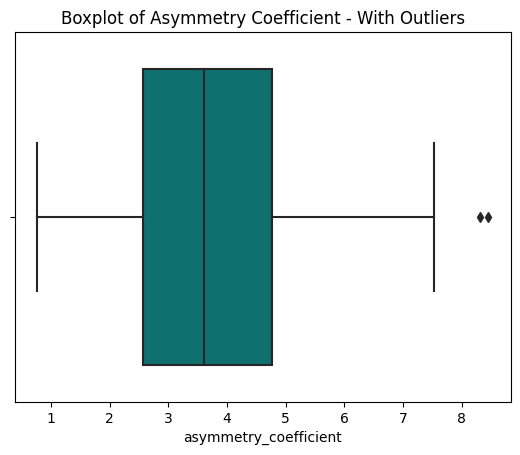

In [16]:
sns.boxplot(data = df, x = 'asymmetry_coefficient', color = 'teal')
plt.title('Boxplot of Asymmetry Coefficient - With Outliers');

In [17]:
Q3 = df['asymmetry_coefficient'].quantile(.75)
Q1 = df['asymmetry_coefficient'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

df['asymmetry_coefficient'] = np.where(df['asymmetry_coefficient'] > UL, UL, np.where(df['asymmetry_coefficient'] < LL, LL, df['asymmetry_coefficient']))

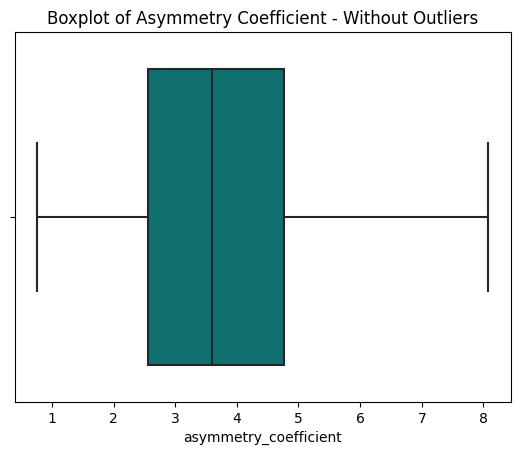

In [18]:
sns.boxplot(data = df, x = 'asymmetry_coefficient', color = 'teal')
plt.title('Boxplot of Asymmetry Coefficient - Without Outliers');

# Data Visualisation

In [19]:
df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coefficient', 'groove_length', 'grain_variety'],
      dtype='object')

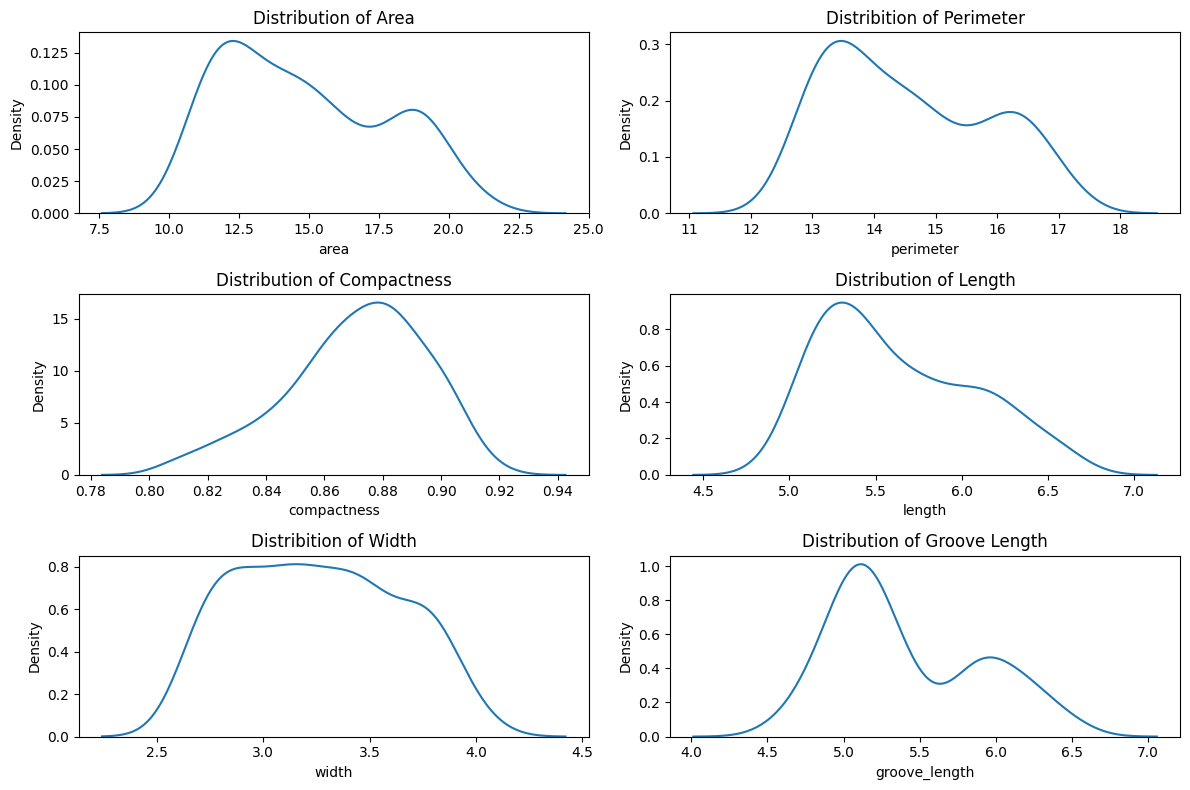

In [20]:
# Distributions:

fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (12,8))

# Subplot 1: Area
sns.kdeplot(data = df, x = 'area', ax=axes[0,0])
axes[0,0].set_title('Distribution of Area');

# Subplot 2: Permieter
sns.kdeplot(data = df, x = 'perimeter', ax=axes[0,1])
axes[0,1].set_title('Distribition of Perimeter');

# Subplot 3: Compactness
sns.kdeplot(data = df, x = 'compactness', ax=axes[1,0])
axes[1,0].set_title('Distribution of Compactness');

# Subplot 4: Length
sns.kdeplot(data = df, x = 'length', ax=axes[1,1])
axes[1,1].set_title('Distribution of Length');

# Subplot 5: Width
sns.kdeplot(data = df, x = 'width', ax=axes[2,0])
axes[2,0].set_title('Distribition of Width');

# Subplot 6: Groove Length
sns.kdeplot(data = df, x = 'groove_length', ax=axes[2,1])
axes[2,1].set_title('Distribution of Groove Length')

plt.tight_layout()
plt.show()

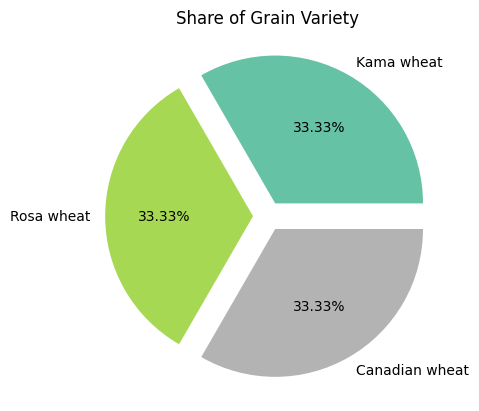

In [21]:
# Grain Variety Share
df['grain_variety'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1, 0.1, 0.1])
plt.title('Share of Grain Variety');
plt.ylabel('');

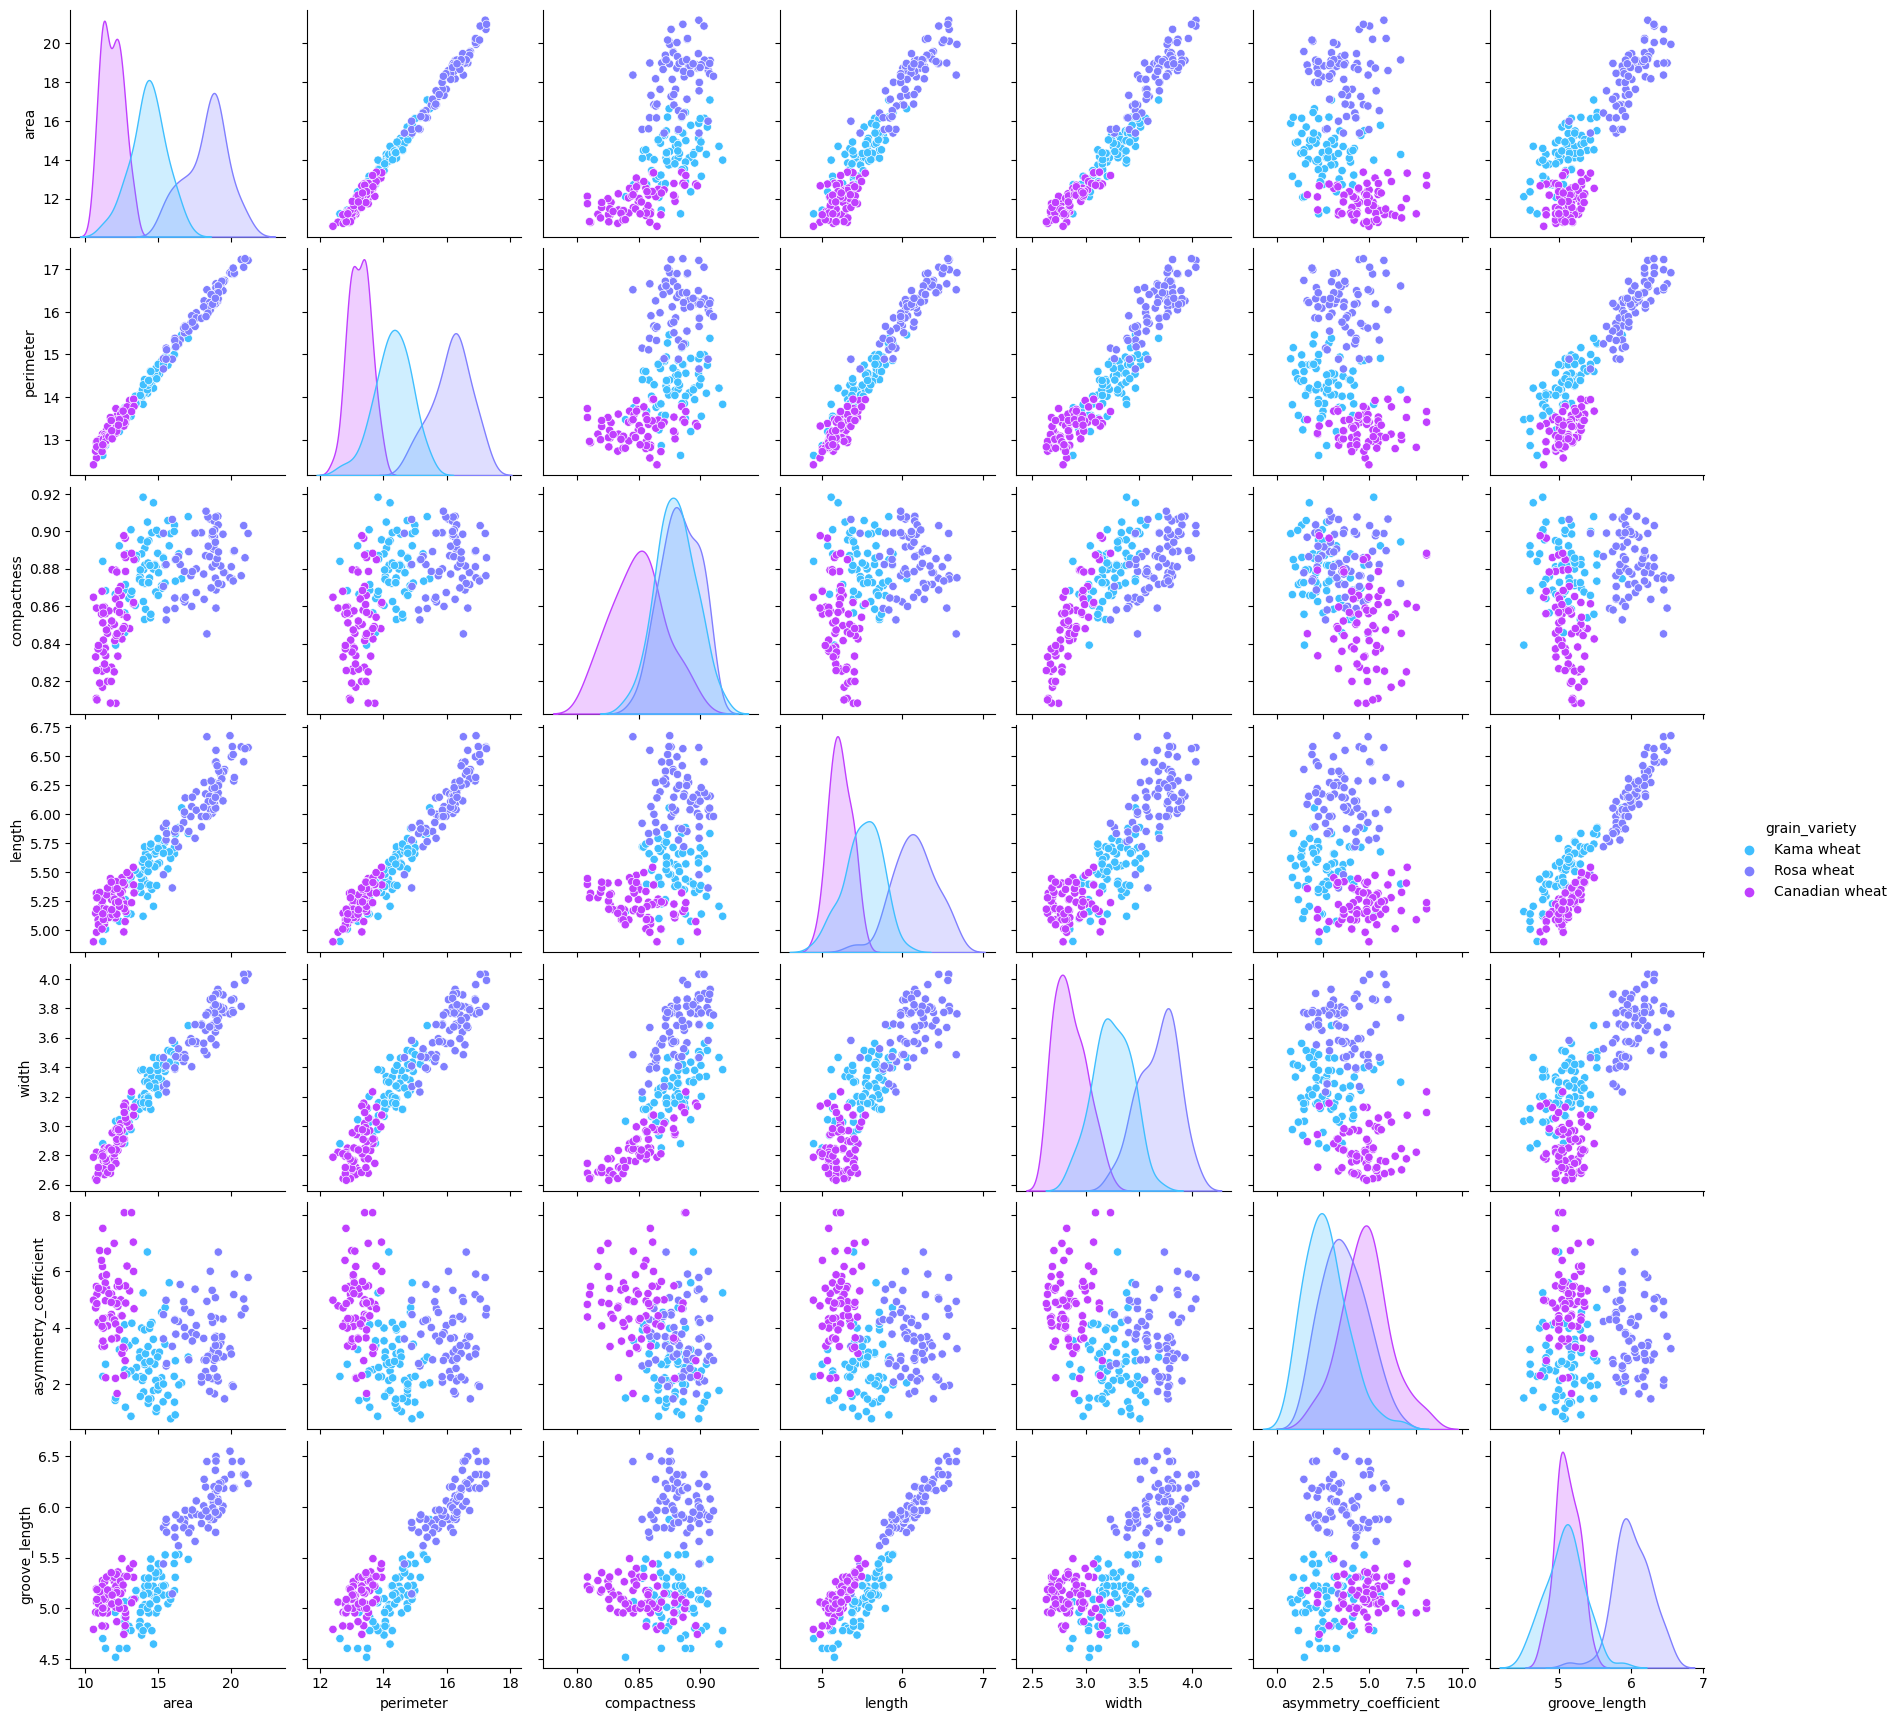

In [22]:
# Pairplot

sns.pairplot(data = df, hue = 'grain_variety', palette = 'cool');

# Clustering

In [23]:
varieties = df['grain_variety']
x = df.drop('grain_variety', axis = 1)
samples = x.values

In [24]:
from sklearn.cluster import KMeans

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
ks = range(1,6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k) # Create a KMean instance with K clusters: model
    model.fit(samples) # Fit models to samples
    inertias.append(model.inertia_) # Append the inertia to list of inertias

In [27]:
inertias # Inertia is an error, also known as wcss

[2714.2953432384284,
 1006.3803191581745,
 583.0548128485071,
 467.7992453499004,
 382.89195875748044]

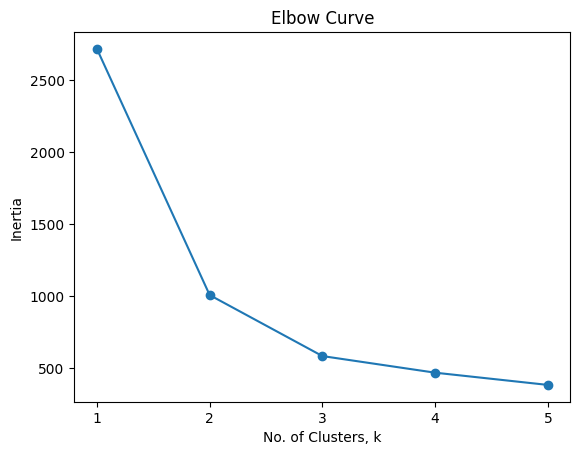

In [28]:
plt.plot(ks, inertias, '-o')
plt.xlabel('No. of Clusters, k');
plt.ylabel('Inertia');
plt.xticks(ks);
plt.title('Elbow Curve');

In [29]:
model = KMeans(n_clusters = 3)
labels = model.fit_predict(samples)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0


In [32]:
print("Conclusion: The dataset was prepared for clustering by separating the target variable ('grain_variety') and features ('x'). KMeans clustering was applied with the number of clusters varying from 1 to 5. An elbow curve was plotted to help determine an appropriate number of clusters, and a value of 3 was selected. The KMeans algorithm was then applied to cluster the samples, and the resulting labels were used to create a cross-tabulation table for further analysis.")

Conclusion: The dataset was prepared for clustering by separating the target variable ('grain_variety') and features ('x'). KMeans clustering was applied with the number of clusters varying from 1 to 5. An elbow curve was plotted to help determine an appropriate number of clusters, and a value of 3 was selected. The KMeans algorithm was then applied to cluster the samples, and the resulting labels were used to create a cross-tabulation table for further analysis.
